In [1]:
# Load Packages
import pandas as pd
#https://pandas.pydata.org/docs/reference/index.html
 
import numpy as np
#https://numpy.org/doc/stable/user/tutorials_index.html

import matplotlib.pyplot as plt
#https://matplotlib.org/tutorials/index.html

from sklearn.decomposition import PCA
#https://scikit-learn.org/stable/user_guide.html

%matplotlib inline
np.set_printoptions(precision=3)
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

#Import Iris Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
print(df.shape)

(150, 5)


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df_2=df.loc[df['species'].isin(['setosa', 'versicolor'])]

In [6]:
df_2D=df_2.drop(['sepal_length', 'sepal_width'], axis=1)

In [7]:
Data_2D=df_2D.loc[45:54,:]

10 samples from Iris Dataset :

In [8]:
Data_2D

,petal_length,petal_width,species
45,1.4,0.3,setosa
46,1.6,0.2,setosa
47,1.4,0.2,setosa
48,1.5,0.2,setosa
49,1.4,0.2,setosa
50,4.7,1.4,versicolor
51,4.5,1.5,versicolor
52,4.9,1.5,versicolor
53,4.0,1.3,versicolor
54,4.6,1.5,versicolor


#Computing the covariance matrix

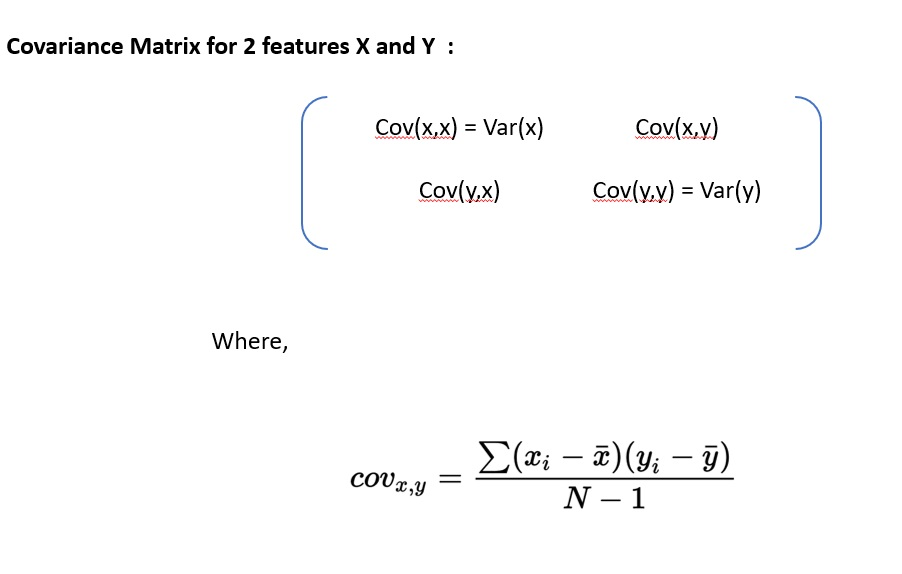

In [9]:
mean_x1=np.mean(Data_2D['petal_length'].values)
mean_x2=np.mean(Data_2D['petal_width'].values)

In [10]:
print(mean_x1)
print(mean_x2)

3.0
0.8300000000000001


In [11]:
x1=(Data_2D['petal_length']-mean_x1)
x2=(Data_2D['petal_width']-mean_x2)

In [12]:
x=pd.concat([x1, x2], axis=1)

In [13]:
x

,petal_length,petal_width
45,-1.6,-0.53
46,-1.4,-0.63
47,-1.6,-0.63
48,-1.5,-0.63
49,-1.6,-0.63
50,1.7,0.57
51,1.5,0.67
52,1.9,0.67
53,1.0,0.47
54,1.6,0.67


In [14]:
data=x.values

In [15]:
data.T.shape

(2, 10)

In [16]:
n_samples = data.shape[0]
cov_matrix = (np.dot(data.T, data)) / (n_samples-1)

In [17]:
print(cov_matrix)

[[2.689 1.053]
 [1.053 0.418]]


#Eigen Decomposition

In [18]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [19]:
print(eig_vectors)

[[ 0.931 -0.365]
 [ 0.365  0.931]]


In [20]:
print(eig_values)

[3.102 0.005]


In [21]:
id = np.argsort(eig_values, axis=0)[::-1]
sorted_EigenVectors = eig_vectors[:, id]

#Compute principal components 

In [22]:
eig_scores = np.dot(data, sorted_EigenVectors[:, :1])

In [23]:
sorted_EigenVectors[:, :1]

array([[0.931],
       [0.365]])

In [24]:
components=pd.DataFrame(eig_scores)

In [25]:
components

,0
0,-1.683034
1,-1.533384
2,-1.719563
3,-1.626473
4,-1.719563
5,1.790735
6,1.641085
7,2.013443
8,1.102580
9,1.734174


#PCA using Scikit-Learn Library

In [26]:
pca = PCA(n_components=1)
np_pca = pca.fit_transform(X=data)

In [27]:
pca.components_

array([[0.931, 0.365]])

In [28]:
pca.explained_variance_

array([3.102])

In [29]:
df_pca=pd.DataFrame(np_pca)
df_pca

,0
0,-1.683034
1,-1.533384
2,-1.719563
3,-1.626473
4,-1.719563
5,1.790735
6,1.641085
7,2.013443
8,1.102580
9,1.734174


In [30]:
Y=Data_2D.loc[:,'species']

In [31]:
rows_setosa = Y=='setosa';
rows_versicolor = Y=='versicolor';

In [32]:
print((df_pca.loc[rows_setosa.tolist(), 0]).shape)
print(df_pca.loc[rows_versicolor.tolist(), 0].shape)

(5,)
(5,)


Text(0.5, 1.0, 'Scatterplot of 1st principal component')

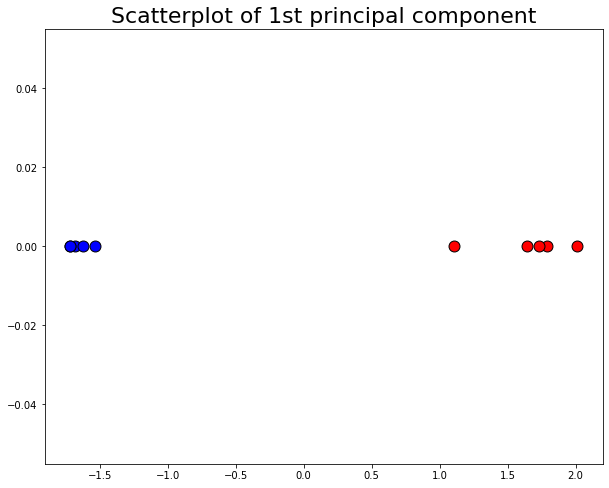

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(df_pca.loc[rows_setosa.tolist(), 0], np.zeros([5]), c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_pca.loc[rows_versicolor.tolist(), 0], np.zeros([5]), c='red', edgecolor='k', s=120, label='One')
ax.set_title("Scatterplot of 1st principal component", fontsize=22)

Text(0.5, 1.0, 'Scatterplot of 2D data')

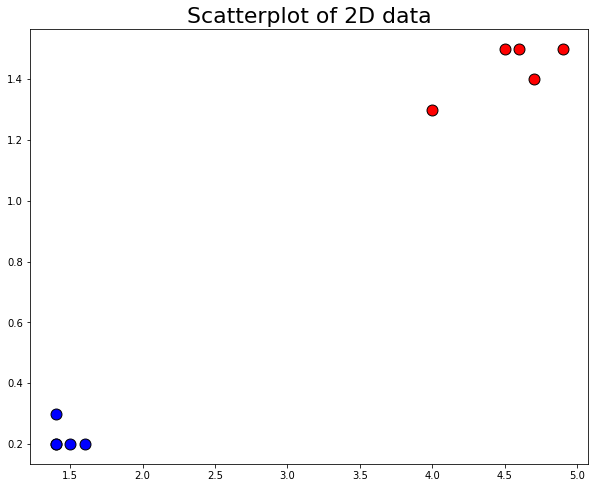

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(Data_2D.loc[rows_setosa.tolist(), 'petal_length'], Data_2D.loc[rows_setosa.tolist(), 'petal_width'], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(Data_2D.loc[rows_versicolor.tolist(), 'petal_length'], Data_2D.loc[rows_versicolor.tolist(), 'petal_width'], c='red', edgecolor='k', s=120, label='One')
ax.set_title("Scatterplot of 2D data", fontsize=22)

In [35]:
original_data = pca.inverse_transform(np_pca)

In [36]:
original_data[:,0]=original_data[:,0]+3.0
original_data[:,1]=original_data[:,1]+0.83

In [37]:
original_data[:,0]

array([1.433, 1.573, 1.399, 1.486, 1.399, 4.667, 4.528, 4.874, 4.026,
       4.614])

In [38]:
original_data #Reconstructed data

array([[1.433, 0.215],
       [1.573, 0.27 ],
       [1.399, 0.202],
       [1.486, 0.236],
       [1.399, 0.202],
       [4.667, 1.484],
       [4.528, 1.429],
       [4.874, 1.565],
       [4.026, 1.233],
       [4.614, 1.463]])

In [39]:
od=	Data_2D[['petal_length','petal_width']].values

In [40]:
mse = ((od- original_data)**2).mean(axis=0)

In [41]:
mse

array([0.001, 0.004])